## Shivam Kumar Mishra 

### Task-3 For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically.  

### Importing the libraries 

In [47]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [48]:
df = pd.read_csv("iris.csv")

In [49]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [50]:
df.drop(['Id'], axis=1,inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [52]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [53]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [54]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### Data Visualisation 

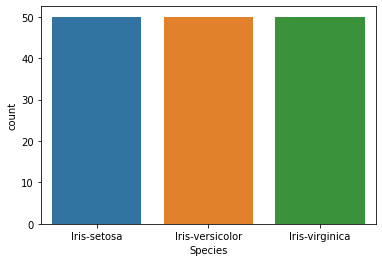

In [55]:
sns.countplot('Species',data=df)

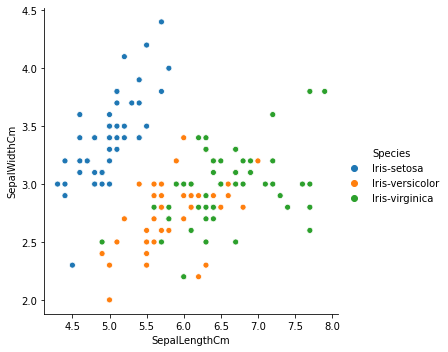

In [56]:
sns.relplot('SepalLengthCm','SepalWidthCm',data=df,hue='Species')

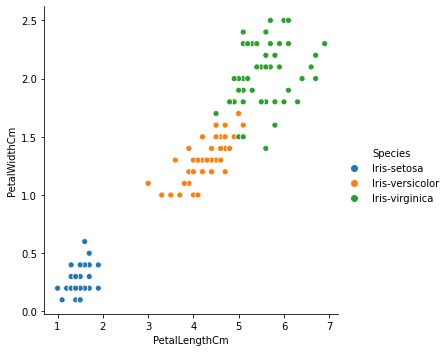

In [57]:
sns.relplot('PetalLengthCm','PetalWidthCm',data=df,hue='Species')

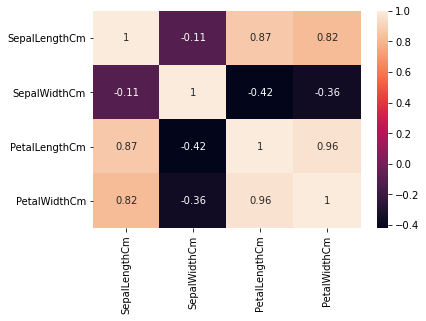

In [58]:
sns.heatmap(df.corr(),annot=True)

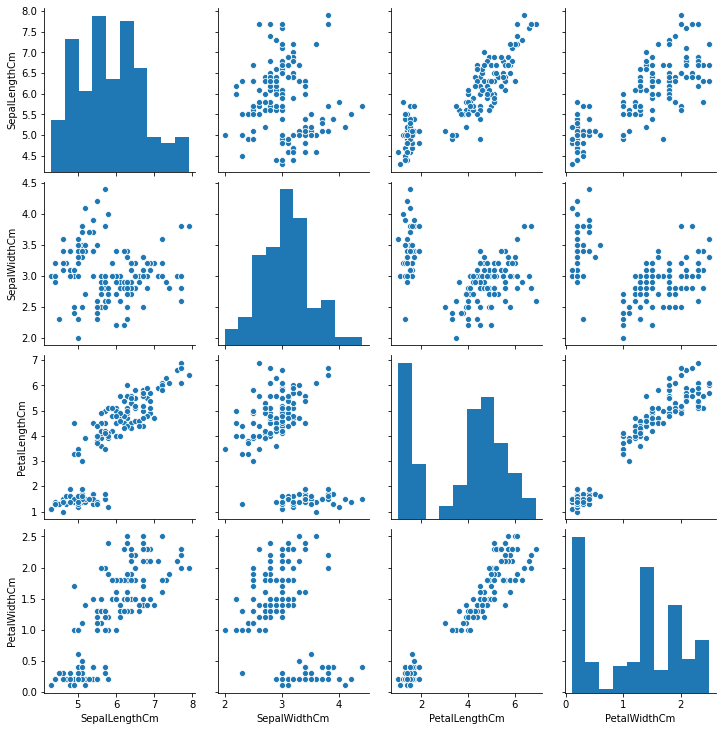

In [59]:
sns.pairplot(df)

In [60]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

### Label encoding 

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### Splitting the dataset into train set & test set 

In [62]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train, y_test = train_test_split(X , y ,test_size=0.25,random_state=0)

In [67]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
y_pred = classifier.predict(X_test)

In [74]:
species = classifier.predict([[4,3,1,1]])
print(species)

[0]


In [75]:
np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)

array([[2, 2],
       [1, 1],
       [0, 0],
       [2, 2],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [0, 0],
       [2, 2],
       [2, 2],
       [1, 1],
       [0, 0],
       [2, 1]])

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.9736842105263158

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test , y_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [79]:
from sklearn.metrics import classification_report
classification_report(y_test , y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        13\n           1       1.00      0.94      0.97        16\n           2       0.90      1.00      0.95         9\n\n    accuracy                           0.97        38\n   macro avg       0.97      0.98      0.97        38\nweighted avg       0.98      0.97      0.97        38\n'